INSTRUCCIONES

Realizar la primera fase del análisis exploratorio (limpieza) usando el archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

In [ ]:
# imports
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = '/content/drive/MyDrive/dataset_banco.csv'
data = pd.read_csv(ruta)


In [ ]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
# Verifica si hay valores nulos en el DataFrame
valores_nulos = data.isnull().sum()

print("Valores nulos en el DataFrame:")
print(valores_nulos)

Valores nulos en el DataFrame:
age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64


Como entiendo que 8 valores nulos de 45215 registros que hay en mi dataset no son significativos en mi análisis, los voy a eliminar.

In [ ]:
# Eliminar las filas que contienen valores nulos en cualquier columna
data.dropna(inplace=True)


Como quiero mostrar detalles sobre mi DataFrame, como el tipo de datos de cada columna y la cantidad de valores no nulos, usaré la función, data.info.

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB
None


In [ ]:
# Verificar si hay filas duplicadas en el DataFrame
filas_duplicadas = data.duplicated().sum()

if filas_duplicadas > 0:
    print("Se encontraron filas duplicadas en el DataFrame.")
    print(f"Número de filas duplicadas: {filas_duplicadas}")
else:
    print("No se encontraron filas duplicadas en el DataFrame.")

Se encontraron filas duplicadas en el DataFrame.
Número de filas duplicadas: 4


Dado que para nuestro estudio no necesitamos las filas duplicadas, lo mejor es eliminarlas.

In [ ]:
datos = data.drop_duplicates()


In [ ]:
# Obtener los tipos de edades presentes en el conjunto de datos
tipos_de_edades = data['age'].unique()

print("Tipos de edades presentes en el conjunto de datos:")
print(tipos_de_edades)

Tipos de edades presentes en el conjunto de datos:
[ 58  44  33  47  35  28  42  43  41  29  53  57  51  45  60  56  32  25
  40  39  52  46  36  49  59  37  50  54  55  48  24  38  31  30  27  34
  23  26  61 530  22 490  21 123  20 332 311 399 466  66  62  83  75  67
  70  65  68  64  69  72  71  19  76  85  63  90  82  73  74  78  80  94
  79  77  86  95  81  18  89  84  87  92 776  93  88]


Decido eliminar las edades superiores a 100 años, porque no las considero significativas para mi estudio.


In [ ]:
df = data[data['age'] < 150]  # Suponiendo que ningún humano vive más de 150 años

In [ ]:
import pandas as pd

# Elimina las filas donde la edad es mayor a 100
data = data.drop(data[data['age'] > 100].index)

# Encontrar la edad máxima después de eliminar las edades superiores a 100
edad_maxima = data['age'].max()

print("La edad máxima es:", edad_maxima)

La edad máxima es: 95


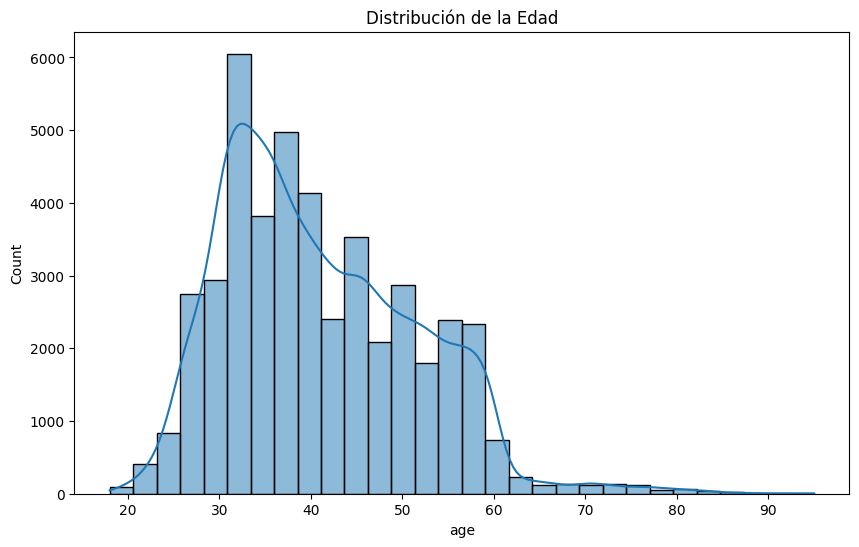

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.show()

In [ ]:
# Obtener la distribución de valores en la columna 'pdays'
distribucion_pdays = data['pdays'].value_counts()

print("Distribución de los valores en la columna 'pdays':")
print(distribucion_pdays)

Distribución de los valores en la columna 'pdays':
pdays
-1.0      36953
 182.0      167
 92.0       147
 91.0       126
 183.0      126
          ...  
 449.0        1
 452.0        1
 648.0        1
 595.0        1
 530.0        1
Name: count, Length: 559, dtype: int64


In [ ]:
# Seleccionar columnas categóricas basadas en su tipo de datos
columnas_categoricas = data.select_dtypes(include=['object'])

print("Columnas categóricas en el conjunto de datos:")
print(columnas_categoricas.columns)

Columnas categóricas en el conjunto de datos:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


Me gustaría saber cuántos unknows y unks hay en cada columna categórica:


In [ ]:
# Primero, cuentas la cantidad de veces que aparece 'unknown' en cada columna categórica
unknown_counts = {}
for column in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']:
    unknown_counts[column] = (data[column] == 'unknown').sum()

print("Cantidad de veces que aparece la palabra 'unknown' en cada variable categórica:")
print(unknown_counts)

Cantidad de veces que aparece la palabra 'unknown' en cada variable categórica:
{'job': 288, 'marital': 0, 'education': 1855, 'default': 0, 'housing': 0, 'loan': 0, 'contact': 13021, 'month': 0, 'poutcome': 36954, 'y': 0}


In [ ]:
import pandas as pd

# Primero, cuentas la cantidad de veces que aparece 'unk' en cada columna categórica
# En este caso, revisarás si la cadena 'unk' es una subcadena dentro de los valores de cada columna.
unk_counts = {}
for column in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']:
    unk_counts[column] = data[column].apply(lambda x: 'unk' in str(x).lower()).sum()

print("Cantidad de veces que aparece la palabra 'unk' en cada variable categórica:")
print(unk_counts)


Cantidad de veces que aparece la palabra 'unk' en cada variable categórica:
{'job': 288, 'marital': 0, 'education': 1857, 'default': 0, 'housing': 0, 'loan': 0, 'contact': 13021, 'month': 0, 'poutcome': 36962, 'y': 0}


En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Observamos que hay errores tipográficos en el dataset, por lo tanto, se deben unificar estos sub-niveles.


Crearemos una función que reemplace ambos términos por un valor común, como "unknown", en todas las columnas relevantes de nuestro DataFrame. Esto puede ser útil para normalizar nuestros datos y facilitar el análisis posterior.

In [ ]:
#Creamos la función
def replace_unknowns(value):
    # Convertir cualquier valor a cadena para asegurar la compatibilidad
    value = str(value).lower()
    if 'unk' in value:  # Esta condición captura tanto 'unk' como 'unknown'
        return 'unknown'
    return value


In [ ]:
#Aplicamos la función a las variables categóricas
import pandas as pd
columns_to_update = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Aplicar la función replace_unknowns a cada una de las columnas categóricas
for column in columns_to_update:
    data[column] = data[column].apply(replace_unknowns)


In [ ]:
#Verificamos que se ha realizado correctamente

# Mostrar los valores únicos para cada columna después de la transformación
for column in columns_to_update:
    print(f"Valores únicos en '{column}': {data[column].unique()}")


Valores únicos en 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative' 'nan']
Valores únicos en 'marital': ['married' 'single' 'div.' 'divorced' 'nan']
Valores únicos en 'education': ['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'nan']
Valores únicos en 'default': ['no' 'yes']
Valores únicos en 'housing': ['yes' 'no']
Valores únicos en 'loan': ['no' 'yes']
Valores únicos en 'contact': ['unknown' 'cellular' 'telephone' 'phone' 'mobile']
Valores únicos en 'month': ['may' 'nov' 'jun' 'jul' 'aug' 'oct' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Valores únicos en 'poutcome': ['unknown' 'failure' 'other' 'success']
Valores únicos en 'y': ['no' 'yes']


In [ ]:
# Seleccionar columnas numéricas basadas en su tipo de datos
columnas_numericas = data.select_dtypes(include=['int64', 'float64'])

print("Columnas numéricas en el conjunto de datos:")
print(columnas_numericas.columns)

Columnas numéricas en el conjunto de datos:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


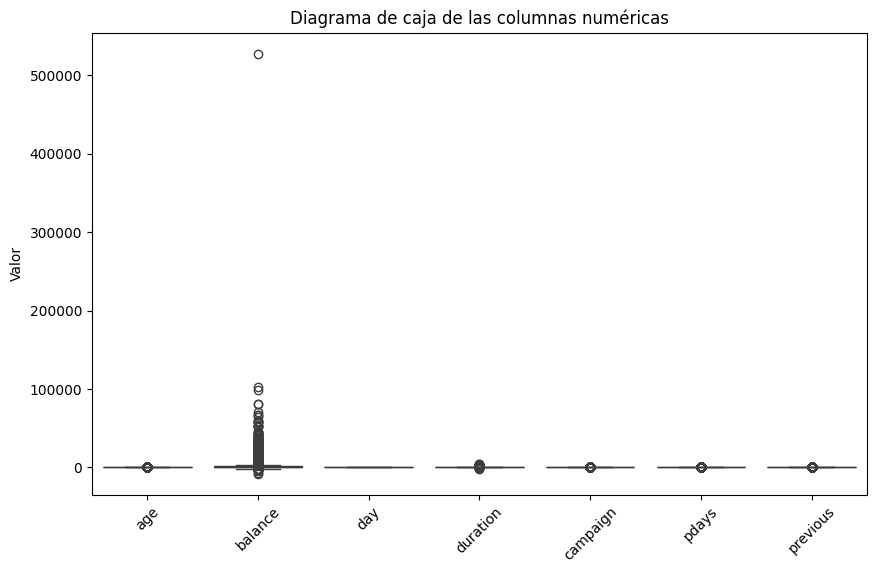

In [ ]:
import seaborn as sns

# Crear un gráfico boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=columnas_numericas)
plt.title('Diagrama de caja de las columnas numéricas')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# VISUALIZACIONES


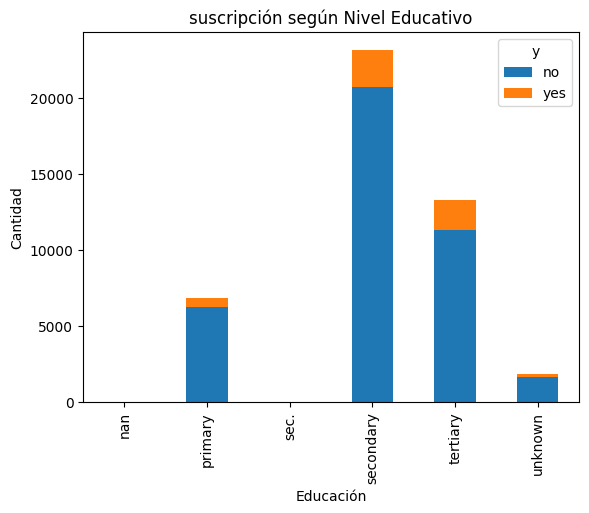

In [ ]:
# Relación entre la educación y la suscripción al depósito a término
pd.crosstab(data['education'], data['y']).plot(kind='bar', stacked=True)
plt.title('suscripción según Nivel Educativo')
plt.xlabel('Educación')
plt.ylabel('Cantidad')
plt.show()



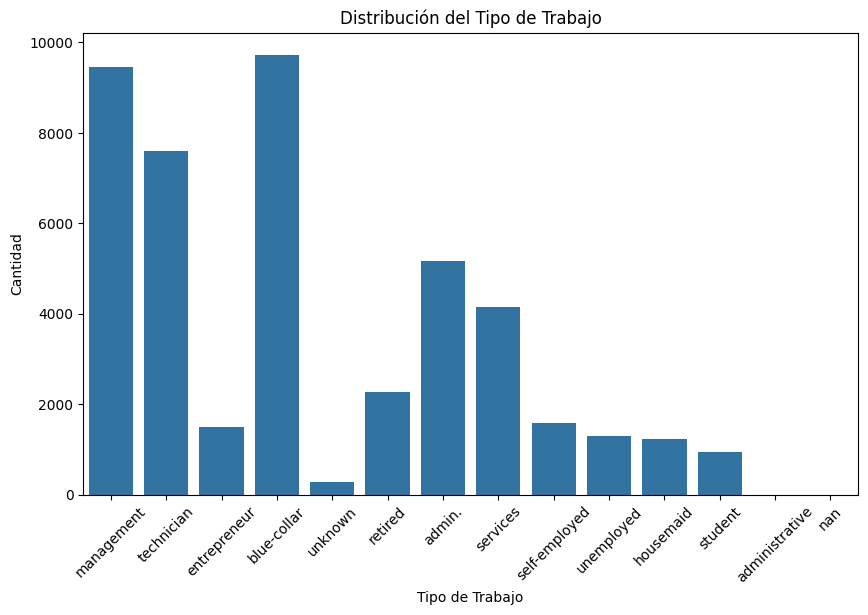

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para el tipo de trabajo
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=data)
plt.title('Distribución del Tipo de Trabajo')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()


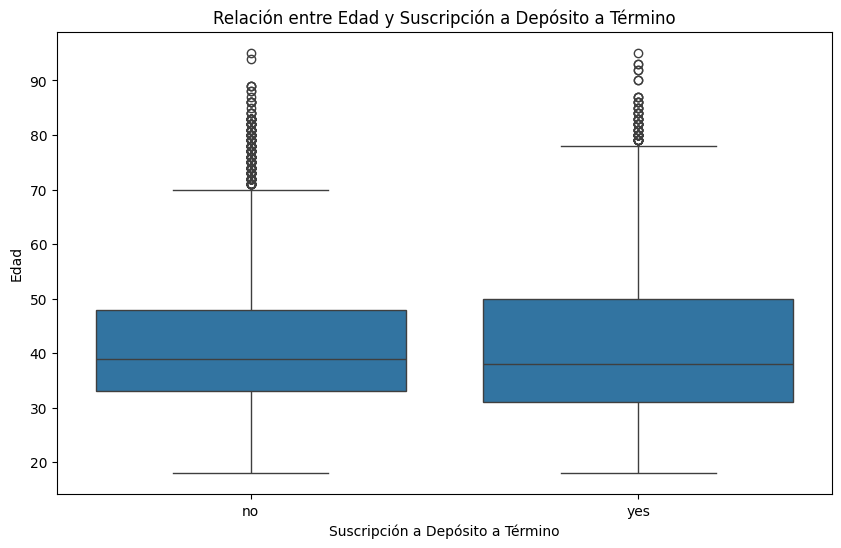

In [ ]:
# Boxplot para examinar la relación entre variables numéricas y categóricas con respecto a la variable objetivo "y"
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=data)
plt.title('Relación entre Edad y Suscripción a Depósito a Término')
plt.xlabel('Suscripción a Depósito a Término')
plt.ylabel('Edad')
plt.show()
